# Experiments simulation 1

## Imports

In [1]:
import os, sys, random, pickle
from datetime import datetime
from zoneinfo import ZoneInfo  
import polars as pl
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.manifold import MDS
from BigEDA.descriptive import outliers_table
from BigEDA.plots import boxplot_matrix, histogram_matrix, barplot_matrix
from FastKmedoids.plots import clustering_MDS_plot_multiple_methods
from PyDistances.mixed import FastGGowerDistMatrix
from FastKmedoids.models import FastKmedoidsGGower, FoldFastKmedoidsGGower
from sklearn_extra.cluster import KMedoids, CLARA
from sklearn.cluster import (KMeans, AgglomerativeClustering,
                             SpectralBiclustering, SpectralCoclustering, Birch, 
                             BisectingKMeans, MiniBatchKMeans)
from sklearn.mixture import GaussianMixture
from clustpy.partition import SubKmeans, LDAKmeans
from clustpy.hierarchical import Diana
sns.set_style('whitegrid')

current_path = os.getcwd()
src_path = os.path.join(current_path, '..', '..', 'src')
config_path = os.path.join(current_path, '..', '..', 'config')
sys.path.append(src_path)
sys.path.append(config_path)

from simulations_utils import get_simulation_1

from experiments_utils import (make_experiment_1, 
                               make_experiment_3, 
                               make_experiment_4,
                               get_pivoted_results, get_avg_results,
                               get_pivoted_results_two_iterables,
                               get_avg_results_two_iterables,
                               avg_results_to_dfs,
                               get_GGower_distances_names, 
                               split_list_in_chunks)

from config_experiment_1_simulation_1 import get_config as get_config_exp_1_sim_1
from config_experiment_3_simulation_1 import get_config as get_config_exp_3_sim_1
from config_experiment_4_simulation_1 import get_config as get_config_exp_4_sim_1


## Data Simulation

---
---

In [2]:
experiment_4_config = get_config_exp_4_sim_1()

In [3]:
fast_kmedoids = FastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_4_config['random_state'],
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1='robust_mahalanobis', 
            d2='sokal', 
            d3='hamming', 
            robust_method='winsorized', 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples']) 

fold_fast_kmedoids = FoldFastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_4_config['random_state'],
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1='robust_mahalanobis', 
            d2='sokal', 
            d3='hamming', 
            robust_method='winsorized', 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples'],
            n_splits=experiment_4_config['n_splits'], 
            shuffle=experiment_4_config['shuffle'], 
            kfold_random_state=experiment_4_config['kfold_random_state']) 

In [4]:
from FastKmedoids.metrics import adjusted_score
from sklearn.metrics import accuracy_score

---

In [5]:
n_realizations = 10
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)
random_state_list = random_state_list + [123]

results = {'adj_acc': {}}
for random_state in random_state_list:
    print(random_state)

    X, y, outliers_idx = get_simulation_1(random_state=random_state, return_outlier_idx=True)
    print(outliers_idx)
    fast_kmedoids.fit(X)  
    adj_accuracy, adj_labels = adjusted_score(y_pred=fast_kmedoids.labels_, y_true=y, metric=accuracy_score)
    results['adj_acc'][random_state] = adj_accuracy

857
[ 9383 11126 18507 ... 21159  4451  3055]
4385
[ 9383 11126 18507 ... 21159  4451  3055]
1428
[ 9383 11126 18507 ... 21159  4451  3055]
6672
[ 9383 11126 18507 ... 21159  4451  3055]
4367
[ 9383 11126 18507 ... 21159  4451  3055]
1764
[ 9383 11126 18507 ... 21159  4451  3055]
625
[ 9383 11126 18507 ... 21159  4451  3055]
6211
[ 9383 11126 18507 ... 21159  4451  3055]
8785
[ 9383 11126 18507 ... 21159  4451  3055]
9213
[ 9383 11126 18507 ... 21159  4451  3055]
123
[ 9383 11126 18507 ... 21159  4451  3055]


In [6]:
results

{'adj_acc': {857: 0.8383714285714285,
  4385: 0.7989714285714286,
  1428: 0.8212571428571429,
  6672: 0.8153142857142858,
  4367: 0.7947714285714286,
  1764: 0.6695142857142857,
  625: 0.8395714285714285,
  6211: 0.8640857142857142,
  8785: 0.8711142857142857,
  9213: 0.8568285714285714,
  123: 0.8562285714285714}}

Sin mantener fijos los outliers: 

{'adj_acc': {857: 0.8906,
  4385: 0.8916285714285714,
  1428: 0.8958857142857143,
  6672: 0.9113428571428571,
  4367: 0.8903714285714286,
  1764: 0.8174285714285714,
  625: 0.9018571428571428,
  6211: 0.9678571428571429,
  8785: 0.9148571428571428,
  9213: 0.9018857142857143,
  123: 0.8562285714285714}}

Manteniendo fijos los outliers: 

{'adj_acc': {857: 0.8383714285714285,
  4385: 0.7989714285714286,
  1428: 0.8212571428571429,
  6672: 0.8153142857142858,
  4367: 0.7947714285714286,
  1764: 0.6695142857142857,
  625: 0.8395714285714285,
  6211: 0.8640857142857142,
  8785: 0.8711142857142857,
  9213: 0.8568285714285714,
  123: 0.8562285714285714}}

---

In [7]:
n_realizations = 10
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)
random_state_list = random_state_list + [123]

results = {'adj_acc': {}}
for random_state in random_state_list:
    print(random_state)

    X, y, outliers_idx = get_simulation_1(random_state=random_state, return_outlier_idx=True)
    print(outliers_idx)
    fold_fast_kmedoids.fit(X)  
    adj_accuracy, adj_labels = adjusted_score(y_pred=fold_fast_kmedoids.labels_, y_true=y, metric=accuracy_score)
    results['adj_acc'][random_state] = adj_accuracy

857
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.34s/it]


4385
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.27s/it]


1428
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:33<00:00,  6.77s/it]


6672
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:30<00:00,  6.14s/it]


4367
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.27s/it]


1764
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.37s/it]


625
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:12<00:00,  2.42s/it]


6211
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.33s/it]


8785
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.89s/it]


9213
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:37<00:00,  7.41s/it]


123
[ 9383 11126 18507 ... 21159  4451  3055]


Clustering Folds: 100%|██████████| 5/5 [00:39<00:00,  7.81s/it]


In [8]:
results

{'adj_acc': {857: 0.8903714285714286,
  4385: 0.9025714285714286,
  1428: 0.8834571428571428,
  6672: 0.9014857142857143,
  4367: 0.8890285714285714,
  1764: 0.8011142857142857,
  625: 0.9012285714285714,
  6211: 0.9584571428571429,
  8785: 0.9137428571428572,
  9213: 0.925,
  123: 0.8362571428571428}}

Sin mantener fijos los outliers: 

{'adj_acc': {857: 0.8897142857142857,
  4385: 0.9037714285714286,
  1428: 0.8846,
  6672: 0.9028285714285714,
  4367: 0.8890571428571429,
  1764: 0.7996571428571428,
  625: 0.8680571428571429,
  6211: 0.9595714285714285,
  8785: 0.9118285714285714,
  9213: 0.9201714285714285,
  123: 0.8362571428571428}}

Manteniendo fijos los outliers: 

{'adj_acc': {857: 0.8903714285714286,
  4385: 0.9025714285714286,
  1428: 0.8834571428571428,
  6672: 0.9014857142857143,
  4367: 0.8890285714285714,
  1764: 0.8011142857142857,
  625: 0.9012285714285714,
  6211: 0.9584571428571429,
  8785: 0.9137428571428572,
  9213: 0.925,
  123: 0.8362571428571428}}

----
---

In [ ]:
X, y, outliers_idx = get_simulation_1(random_state=123, return_outlier_idx=True)

In [8]:
# polars conversion for data exploration
X_pl = pl.from_pandas(X)

## Data Exploration

In [9]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,-2.651313,0.425178,-4.840969,4.436158,0,0,0,2
1,-32.573721,-26.135065,-0.516458,-1.903982,0,1,0,0
2,6.366665,2.813932,-2.505519,-7.371732,0,1,0,0
3,-5.000105,-7.485500,3.060407,4.966358,0,1,2,1
4,-4.931669,-6.980633,2.779526,-2.976350,1,1,2,2


In [10]:
# Proportion of individuals per cluster/group
unique_values, counts = np.unique(y, return_counts=True)
prop_clusters = counts/len(y)
prop_clusters = {k: v for k, v in zip(unique_values, prop_clusters)}
print(f'prop_clusters: {prop_clusters}')

prop_clusters: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


In [11]:
# Outliers information
outliers_table(X_pl, auto=False, col_names=['X1', 'X2', 'X3', 'X4'], h=1.5)

quant_variables,lower_bound,upper_bound,n_outliers,n_not_outliers,prop_outliers,prop_not_outliers
str,f64,f64,i64,i64,f64,f64
"""X1""",-17.363535,16.862265,1609,33391,0.045971,0.954029
"""X2""",-12.655664,3.936432,1774,33226,0.050686,0.949314
"""X3""",-11.847622,6.501432,43,34957,0.001229,0.998771
"""X4""",-10.074609,11.152553,519,34481,0.014829,0.985171


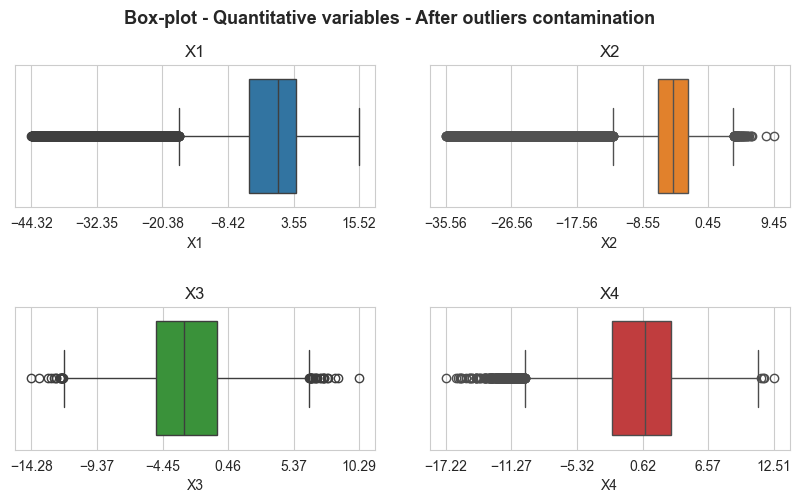

In [12]:
# Boxplot after outliers contamination
boxplot_matrix(X_pl, 
               n_cols=2, 
               title='Box-plot - Quantitative variables - After outliers contamination', 
               figsize=(10,5), 
               quant_col_names=['X1', 'X2', 'X3', 'X4'], 
               n_xticks=6, 
               title_fontsize=13, 
               save=False, 
               file_name='', 
               x_rotation=0, 
               title_height=0.99,
               style='whitegrid', 
               hspace=0.7, 
               wspace=0.15, 
               title_weight='bold',
               subtitles_fontsize=12, 
               xlabel_size=10)

In [13]:
# Boxplot before outliers contamination
'''
boxplot_matrix(X_not_outliers, 
               n_cols=2, 
               title='Box-plot - Quantitative variables - Before outliers contamination', 
               figsize=(10,5), 
               quant_col_names=['X1', 'X2', 'X3', 'X4'], 
               n_xticks=6, 
               title_fontsize=13, 
               save=False, 
               file_name='', 
               x_rotation=0, 
               title_height=0.99,
               style='whitegrid', 
               hspace=0.7, 
               wspace=0.15, 
               title_weight='bold',
               subtitles_fontsize=12, 
               xlabel_size=10)
'''

"\nboxplot_matrix(X_not_outliers, \n               n_cols=2, \n               title='Box-plot - Quantitative variables - Before outliers contamination', \n               figsize=(10,5), \n               quant_col_names=['X1', 'X2', 'X3', 'X4'], \n               n_xticks=6, \n               title_fontsize=13, \n               save=False, \n               file_name='', \n               x_rotation=0, \n               title_height=0.99,\n               style='whitegrid', \n               hspace=0.7, \n               wspace=0.15, \n               title_weight='bold',\n               subtitles_fontsize=12, \n               xlabel_size=10)\n"

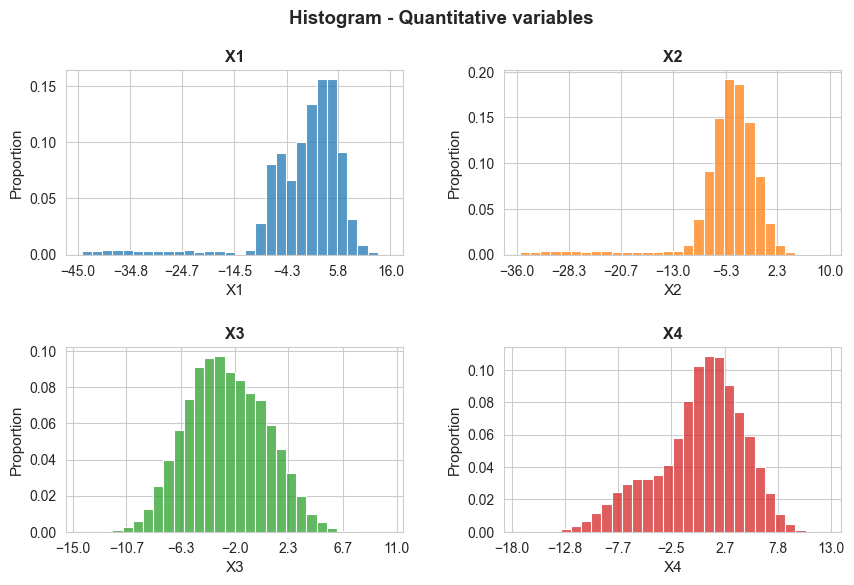

In [14]:
# Histogram
histogram_matrix(df=X_pl, bins=30, n_cols=2, title='Histogram - Quantitative variables', 
                 figsize=(10,6), quant_col_names=['X1', 'X2', 'X3', 'X4'], 
                 n_xticks=7, title_fontsize=13.5, 
                 subtitles_fontsize=11.5, save=False, file_name='', x_rotation=0, title_height=0.98,
                 style='whitegrid', hspace=0.5, wspace=0.3, n_round_xticks=1)

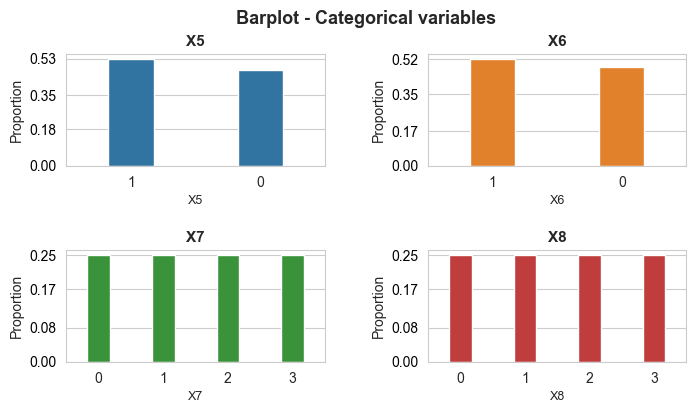

In [15]:
# Barplot
barplot_matrix(df=X_pl, n_cols=2, title='Barplot - Categorical variables', 
                 figsize=(8,4), cat_col_names=['X5', 'X6', 'X7', 'X8'], 
                 title_fontsize=13, subtitles_fontsize=11, 
                 save=False, file_name='', x_rotation=0, title_height=0.99,
                 style='whitegrid', hspace=0.75, wspace=0.4, title_weight='bold', bar_width=0.35,
                 ylabel_size=10, xlabel_size=9, xticks_size=10)

In [16]:
# Correlation Matrix
X[['X1', 'X2', 'X3', 'X4']].corr()

,X1,X2,X3,X4
X1,1.000000,0.791927,-0.284546,-0.167647
X2,0.791927,1.000000,-0.117777,0.051606
X3,-0.284546,-0.117777,1.000000,-0.044339
X4,-0.167647,0.051606,-0.044339,1.000000


In [17]:
# Correlation Analysis
corr_matrix = X[['X1', 'X2', 'X3', 'X4']].corr().to_numpy()
n_corr = len(corr_matrix[np.triu_indices_from(corr_matrix, k=1)])
n_corr_below_30 = np.sum(np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) < 0.30)
n_corr_above_60 = np.sum(np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) > 0.60)
n_corr_between = np.sum((np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) >= 0.30) & (np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) <= 0.60))
                        
print('Proportion of pair-wise correlation > 0.60 (in abs. value): ', np.round(n_corr_above_60 / n_corr, 2))
print('Proportion of pair-wise correlations in [0.30, 0.60]: ', np.round(n_corr_between / n_corr, 2))
print('Proportion of pair-wise correlation < 0.30 (in abs. value): ', np.round(n_corr_below_30 / n_corr, 2))

Proportion of pair-wise correlation > 0.60 (in abs. value):  0.17
Proportion of pair-wise correlations in [0.30, 0.60]:  0.0
Proportion of pair-wise correlation < 0.30 (in abs. value):  0.83


## Experiment 1: Accuracy and computation time for Fast k-medoids

In [22]:
run_experiment_1 = True

In [ ]:
if run_experiment_1: 
        
    n_realizations = 100
    experiment_random_state = 123 
    random.seed(experiment_random_state)
    random_state_list = random.sample(range(n_realizations*1000), n_realizations)

    chunk_size = 5
    random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

    results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_1', 'simulation_1')
    os.makedirs(results_folder_path, exist_ok=True)
    file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')

    experiment_1_config = get_config_exp_1_sim_1()

    X, y = get_simulation_1(random_state=experiment_random_state, return_outlier_idx=False)

    for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks, desc='chunks', unit='chunks', position=0)):
        print('random_state_chunk:', random_state_chunk)

        results = {}

        for random_state in random_state_chunk:
            print('random_state:', random_state)
                
            results[random_state] = make_experiment_1(**experiment_1_config,
                                                    X=X, 
                                                    y=y,
                                                    random_state=random_state)
            
        # Save results
        results_filename = f'results_exp_1_simu_1_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'wb') as f:
            pickle.dump(results, f)


# Time 100 realization
## Personal computer: 
## IBiDat Server: 364 mins = 6.06 hours  

In [ ]:
if run_experiment_1: 

    # Open results by chunk
    chunk_ids = range(len(random_state_list_chunks))
    results_chunk = {}
    for chunk_id in chunk_ids:
        results_filename = f'results_exp_1_simu_1_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'rb') as f:
            results_chunk[chunk_id] = pickle.load(f)

    # Join results by chunks
    results = {}
    for i in chunk_ids:
        results.update(results_chunk[i])  

    # Save joined/merged results 
    results_filename = f'results_exp_1_simu_1_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)

In [ ]:
# Open merged/joined results 
file_id = '20250710_102201'
results_filename = f'results_exp_1_simu_1_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_1', 'simulation_1')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    results = pickle.load(f)

In [27]:
experiment_1_config = get_config_exp_1_sim_1()

pivoted_results = get_pivoted_results(
    results=results, 
    iterable=experiment_1_config['frac_sample_sizes']
)

avg_results = get_avg_results(
    results=results, 
    pivoted_results=pivoted_results, 
    iterable=experiment_1_config['frac_sample_sizes']
)

In [28]:
frac_sample_sizes_list = np.array(list(avg_results['adj_accuracy'].keys()))
adj_accuracy_list = list(avg_results['adj_accuracy'].values())
ari_list = list(avg_results['ARI'].values())
time_list = list(avg_results['time'].values())
best_frac_sample_size = frac_sample_sizes_list[np.argmax(adj_accuracy_list)]

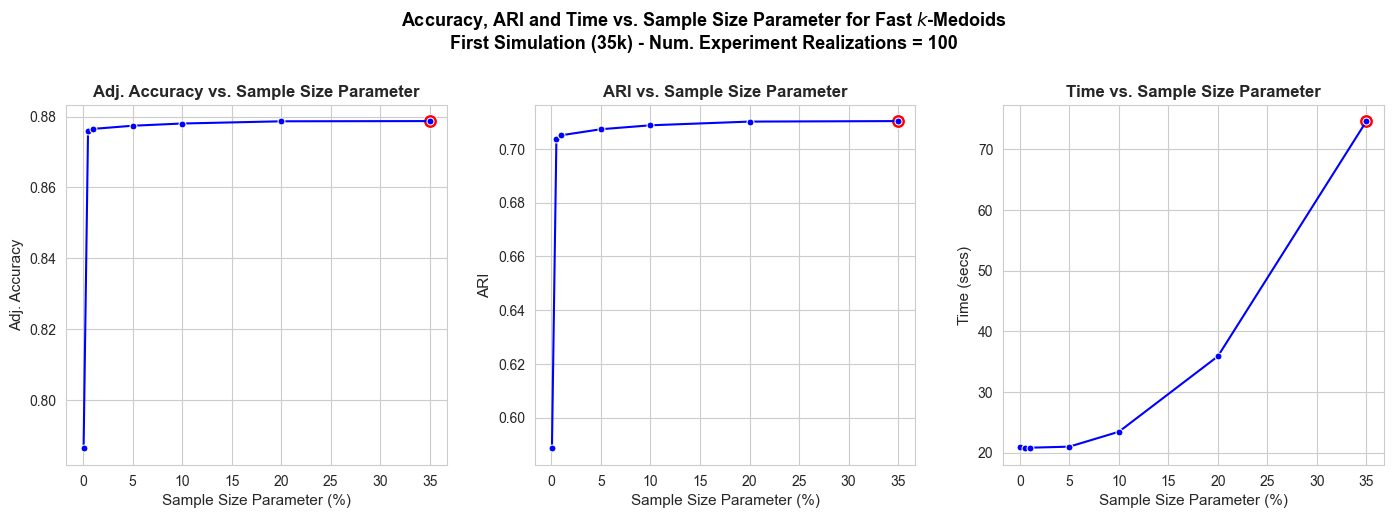

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(17,5))
axes = axes.flatten()  

sns.lineplot(x=[best_frac_sample_size * 100], y=[avg_results['adj_accuracy'][best_frac_sample_size]], color='red', marker='o',  markersize=10, ax=axes[0])
sns.lineplot(
    x=frac_sample_sizes_list * 100,
    y=adj_accuracy_list, 
    color='blue', marker='o',  markersize=5, ax=axes[0]
)

sns.lineplot(x=[best_frac_sample_size * 100], y=[avg_results['ARI'][best_frac_sample_size]], color='red', marker='o',  markersize=10, ax=axes[1])
sns.lineplot(
    x=frac_sample_sizes_list * 100,
    y=ari_list, 
    color='blue', marker='o',  markersize=5, ax=axes[1]
)

sns.lineplot(x=[best_frac_sample_size * 100], y=[avg_results['time'][best_frac_sample_size]], color='red', marker='o', markersize=10, ax=axes[2])
sns.lineplot(
    x=frac_sample_sizes_list * 100,
    y=time_list, 
    color='blue', marker='o', markersize=5, ax=axes[2]
)

axes[0].set_title('Adj. Accuracy vs. Sample Size Parameter', size=12, weight='bold')
axes[0].set_ylabel('Adj. Accuracy', size=11)
#axes[0].set_yticks(np.round(np.linspace(np.min(best_accuracy_values), np.max(best_accuracy_values), 7),3))

axes[1].set_title('ARI vs. Sample Size Parameter', size=12, weight='bold')
axes[1].set_ylabel('ARI', size=11)
#axes[1].set_yticks(np.round(np.linspace(np.min(best_accuracy_values), np.max(best_accuracy_values), 7),3))

axes[2].set_title('Time vs. Sample Size Parameter', size=12, weight='bold')
axes[2].set_ylabel('Time (secs)', size=11)
#axes[2].set_yticks(np.round(np.linspace(np.min(times_values), np.max(times_values), 7),1))

for i in range(len(axes)):
    #axes[i].set_xticks(np.round(np.linspace(np.min(data_perc_sizes), np.max(data_perc_sizes), 7),1))
    axes[i].set_xlabel('Sample Size Parameter (%)', size=11)

#plt.tight_layout()
plt.subplots_adjust(top=0.83)
plt.suptitle('Accuracy, ARI and Time vs. Sample Size Parameter for Fast $k$-Medoids\nFirst Simulation (35k) - Num. Experiment Realizations = 100', fontsize=13, y=1.02, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=0.5, wspace=0.23) 

plot_filename = f'plot_results_exp_1_simu_1_{file_id}.png'
plot_save_path = os.path.join(results_folder_path, plot_filename)
fig.savefig(plot_save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)

plt.show()

In [51]:
# Results as table 
avg_results_df = pd.DataFrame(avg_results)
avg_results_df.index.name = 'frac_sample_size'
avg_results_df

,time,adj_accuracy,ARI
frac_sample_size,,,
0.0005,20.951821,0.786402,0.588522
0.0050,20.716412,0.875934,0.703739
0.0100,20.822553,0.876518,0.705090
0.0500,20.996505,0.877413,0.707322
0.1000,23.452654,0.878040,0.708787
0.2000,35.897343,0.878665,0.710166
0.3500,74.660429,0.878725,0.710354


In [43]:
print(best_frac_sample_size)

0.35


## Experiment 3: Accuracy, computation time and number of folds for q-Fold Fast k-medoids

In [ ]:
run_experiment_3 = False

In [ ]:
if run_experiment_3: 

    n_realizations = 100
    experiment_random_state = 123 
    random.seed(experiment_random_state)
    random_state_list = random.sample(range(n_realizations*1000), n_realizations)

    chunk_size = 4
    random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

    results_folder_path = os.path.join(current_path, '..',  '..', '..', 'results', 'results_experiment_3', 'simulation_1')
    os.makedirs(results_folder_path, exist_ok=True)
    file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')

    experiment_3_config = get_config_exp_3_sim_1()

    X, y = get_simulation_1(random_state=experiment_random_state, return_outlier_idx=False)

    for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks, desc='chunks', unit='chunks', position=0)):
        print('random_state_chunk:', random_state_chunk)

        results = {}

        for random_state in random_state_chunk:
            print('random_state:', random_state)    

            results[random_state] = make_experiment_3(**experiment_3_config,
                                                    X=X, 
                                                    y=y,
                                                    random_state=random_state)

        # Save results
        results_filename = f'results_exp_3_simu_1_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'wb') as f:
            pickle.dump(results, f)

# Time 1 realization ('n_splits': np.array([5, 10, 20, 30, 40]), 'frac_sample_sizes': np.array([0.005 0.05, 0.1, 0.25]))
## Personal computer: 21 mins
## IBiDat Server: 12 mins

# Time 100 realization
## IBiDat Server: 700 mins = 11.66 hours

chunks:   0%|          | 0/25 [00:00<?, ?chunks/s]

random_state_chunk: [6863, 35084, 11427, 53377]
random_state: 6863
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.04s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.26s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:29<00:00,  1.45s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


random_state: 35084
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.42s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 11427
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.25it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


random_state: 53377
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.20s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


chunks:   4%|▍         | 1/25 [28:08<11:15:31, 1688.81s/chunks]

random_state_chunk: [34937, 14116, 5000, 49692]
random_state: 34937
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.05s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:21<00:00,  1.10s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.28it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.25it/s]


random_state: 14116
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.80s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.12s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


random_state: 5000
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.20s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.35s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 49692
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.31s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


chunks:   8%|▊         | 2/25 [55:56<10:42:39, 1676.51s/chunks]

random_state_chunk: [70281, 73704, 43541, 44669]
random_state: 70281
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.04s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:22<00:00,  4.43s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 73704
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:22<00:00,  4.40s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


random_state: 43541
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.24it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


random_state: 44669
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.12s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.25


chunks:  12%|█▏        | 3/25 [1:24:17<10:18:43, 1687.44s/chunks]

random_state_chunk: [6802, 20927, 17702, 44199]
random_state: 6802
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.01s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.11it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


random_state: 20927
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  4.00s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.21it/s]


random_state: 17702
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


random_state: 44199
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.93s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.11it/s]


frac_sample_size: 0.25


chunks:  16%|█▌        | 4/25 [1:52:33<9:51:49, 1690.91s/chunks] 

random_state_chunk: [73526, 43751, 91971, 32134]
random_state: 73526
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.74s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.20s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.12s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.18it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.24it/s]


random_state: 43751
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.82s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.77s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.00s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 91971
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 32134
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:22<00:00,  4.42s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.83s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.35s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.25


chunks:  20%|██        | 5/25 [2:20:38<9:22:54, 1688.73s/chunks]

random_state_chunk: [21466, 218, 57183, 11483]
random_state: 21466
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


random_state: 218
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 57183
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.29s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.30s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:21<00:00,  1.08s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 11483
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


chunks:  24%|██▍       | 6/25 [2:49:00<8:56:12, 1693.30s/chunks]

random_state_chunk: [78328, 49492, 9158, 864]
random_state: 78328
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.11s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 49492
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.12s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.26s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


random_state: 9158
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 864
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.11s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


frac_sample_size: 0.25


chunks:  28%|██▊       | 7/25 [3:16:59<8:26:35, 1688.64s/chunks]

random_state_chunk: [41347, 95949, 58762, 13374]
random_state: 41347
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.04s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.82s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.75s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.28it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.26it/s]


random_state: 95949
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.01s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.81s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


random_state: 58762
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


random_state: 13374
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


chunks:  32%|███▏      | 8/25 [3:44:29<7:54:57, 1676.35s/chunks]

random_state_chunk: [5752, 12158, 87443, 18635]
random_state: 5752
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.06s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.25s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


random_state: 12158
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.39s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


random_state: 87443
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.21it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.03it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


random_state: 18635
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.12s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


chunks:  36%|███▌      | 9/25 [4:12:44<7:28:34, 1682.13s/chunks]

random_state_chunk: [16547, 2783, 38247, 56444]
random_state: 16547
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


random_state: 2783
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.04s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


random_state: 38247
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.93s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


random_state: 56444
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


frac_sample_size: 0.25


chunks:  40%|████      | 10/25 [4:40:32<6:59:25, 1677.72s/chunks]

random_state_chunk: [75157, 62511, 34776, 61511]
random_state: 75157
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.76s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.71s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.20s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.18it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


random_state: 62511
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.72s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.73s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.21it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.24it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


random_state: 34776
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.20s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.96s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.24it/s]


random_state: 61511
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


chunks:  44%|████▍     | 11/25 [5:07:46<6:28:23, 1664.52s/chunks]

random_state_chunk: [4816, 39989, 45018, 68376]
random_state: 4816
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.11s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 39989
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.77s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.29s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 45018
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.01s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.81s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:28<00:00,  1.38it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


random_state: 68376
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:22<00:00,  4.41s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.07s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.06s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:29<00:00,  1.50s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


chunks:  48%|████▊     | 12/25 [5:35:48<6:01:48, 1669.86s/chunks]

random_state_chunk: [63302, 27113, 79810, 83723]
random_state: 63302
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.81s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.36s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.00s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 27113
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.11s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


random_state: 79810
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.01s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


random_state: 83723
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.82s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


chunks:  52%|█████▏    | 13/25 [6:03:37<5:33:53, 1669.43s/chunks]

random_state_chunk: [69084, 74031, 41322, 1644]
random_state: 69084
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.07s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.80s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  2.00s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


random_state: 74031
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.67s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.12s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.27it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 41322
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.93s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


random_state: 1644
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.78s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


chunks:  56%|█████▌    | 14/25 [6:30:57<5:04:26, 1660.63s/chunks]

random_state_chunk: [52197, 84692, 67207, 56935]
random_state: 52197
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.35s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 84692
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.83s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 67207
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.11it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 56935
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:22<00:00,  4.41s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:24<00:00,  2.45s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:30<00:00,  1.51s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:39<00:00,  1.02it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


frac_sample_size: 0.25


chunks:  60%|██████    | 15/25 [6:59:06<4:38:12, 1669.25s/chunks]

random_state_chunk: [89762, 70584, 83670, 87380]
random_state: 89762
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.20s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


random_state: 70584
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


random_state: 83670
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.06s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


random_state: 87380
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.20s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.11it/s]


frac_sample_size: 0.25


chunks:  64%|██████▍   | 16/25 [7:27:16<4:11:18, 1675.38s/chunks]

random_state_chunk: [78185, 63718, 68237, 87617]
random_state: 78185
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.28it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.25it/s]


random_state: 63718
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.01s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.68s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.10s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


random_state: 68237
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.80s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  2.00s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


random_state: 87617
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.78s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


chunks:  68%|██████▊   | 17/25 [7:54:58<3:42:51, 1671.43s/chunks]

random_state_chunk: [54984, 49089, 66855, 4173]
random_state: 54984
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.31s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.42s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


random_state: 49089
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.26s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 66855
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.24it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:29<00:00,  1.37it/s]


random_state: 4173
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.25


chunks:  72%|███████▏  | 18/25 [8:23:12<3:15:47, 1678.18s/chunks]

random_state_chunk: [98850, 84600, 23784, 95135]
random_state: 98850
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.42s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


random_state: 84600
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.12s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.93s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.31s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.05it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


random_state: 23784
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.07s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.24it/s]


random_state: 95135
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.20s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


chunks:  76%|███████▌  | 19/25 [8:51:17<2:48:00, 1680.08s/chunks]

random_state_chunk: [10827, 63819, 86255, 34326]
random_state: 10827
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.11s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.27it/s]


random_state: 63819
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  4.00s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.72s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.65s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.96s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


random_state: 86255
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.80s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.21it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


random_state: 34326
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.11s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.20s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.20s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


frac_sample_size: 0.25


chunks:  80%|████████  | 20/25 [9:18:39<2:19:03, 1668.79s/chunks]

random_state_chunk: [22298, 43896, 44160, 72640]
random_state: 22298
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.06s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.28s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 43896
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.93s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.01s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.20s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


random_state: 44160
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.35s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


random_state: 72640
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.37s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.33s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


frac_sample_size: 0.25


chunks:  84%|████████▍ | 21/25 [9:46:53<1:51:44, 1676.24s/chunks]

random_state_chunk: [51274, 9606, 94779, 59869]
random_state: 51274
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  4.00s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.01s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.23it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


random_state: 9606
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.79s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 94779
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.21it/s]


random_state: 59869
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.35s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.25it/s]


frac_sample_size: 0.25


chunks:  88%|████████▊ | 22/25 [10:14:49<1:23:48, 1676.30s/chunks]

random_state_chunk: [50810, 75126, 44054, 2137]
random_state: 50810
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.31s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.12s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.26it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.28it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.26it/s]


random_state: 75126
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.75s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.72s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


random_state: 44054
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.05s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.20s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


random_state: 2137
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.07s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:22<00:00,  1.15s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


chunks:  92%|█████████▏| 23/25 [10:42:01<55:25, 1662.94s/chunks]  

random_state_chunk: [24780, 76834, 11554, 82354]
random_state: 24780
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


random_state: 76834
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.07s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.20s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 11554
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.04s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:31<00:00,  1.26it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


random_state: 82354
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.12s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:22<00:00,  4.42s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.25


chunks:  96%|█████████▌| 24/25 [11:10:18<27:53, 1673.34s/chunks]

random_state_chunk: [47646, 1681, 46126, 30032]
random_state: 47646
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 1681
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.29s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.25it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


random_state: 46126
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:33<00:00,  1.18it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 40/40 [00:32<00:00,  1.24it/s]


random_state: 30032
n_splits: 5
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.85s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


n_splits: 10
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


n_splits: 20
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


frac_sample_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


n_splits: 40
frac_sample_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


frac_sample_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


frac_sample_size: 0.25


chunks: 100%|██████████| 25/25 [11:38:26<00:00, 1676.28s/chunks]


In [6]:
if run_experiment_3: 

    # Open results by chunk
    chunk_ids = range(len(random_state_list_chunks))
    results_chunk = {}
    for chunk_id in chunk_ids:
        results_filename = f'results_exp_3_simu_1_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'rb') as f:
            results_chunk[chunk_id] = pickle.load(f)

    # Join results by chunks
    results = {}
    for i in chunk_ids:
        results.update(results_chunk[i])  

    # Save joined/merged results 
    results_filename = f'results_exp_3_simu_1_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)

In [3]:
# Open merged/joined results 
file_id = '20250710_180106'
results_filename = f'results_exp_3_simu_1_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_3', 'simulation_1')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    results = pickle.load(f)

In [4]:
experiment_3_config = get_config_exp_3_sim_1()

pivoted_results = get_pivoted_results_two_iterables(results = results, 
                                  iterable1 = experiment_3_config['n_splits'], 
                                  iterable2 = experiment_3_config['frac_sample_sizes'])

avg_results = get_avg_results_two_iterables(results = results, 
                                  pivoted_results = pivoted_results, 
                                  iterable1 = experiment_3_config['n_splits'], 
                                  iterable2 = experiment_3_config['frac_sample_sizes'])

dfs = avg_results_to_dfs(avg_results, column_1='n_splits', column_2='frac_sample_sizes')

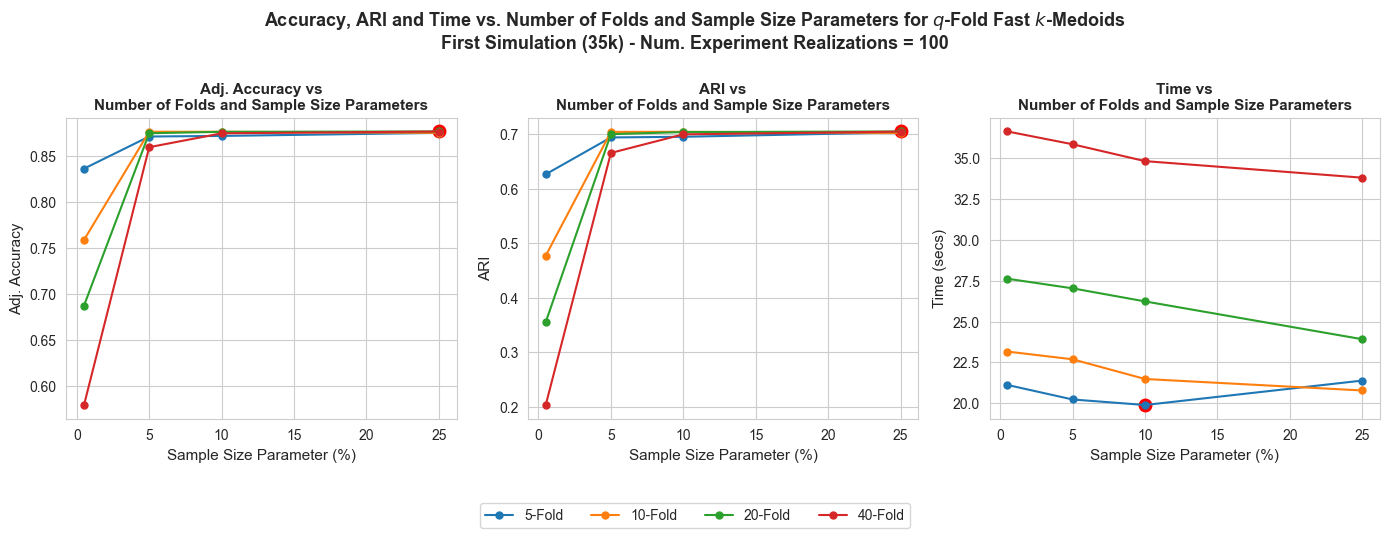

In [5]:
best_combi_acc = dfs['adj_accuracy'].sort_values(by='adj_accuracy', ascending=False).iloc[0]
best_combi_ari = dfs['ARI'].sort_values(by='ARI', ascending=False).iloc[0]
best_combi_time = dfs['time'].sort_values(by='time', ascending=True).iloc[0]

fig, axes = plt.subplots(1, 3, figsize=(14, 5.5), sharex=True)

# Primer subplot: Accuracy
ax1 = axes[0]
ax1.plot(best_combi_acc['frac_sample_sizes'] * 100, best_combi_acc['adj_accuracy'], marker='o', markersize=9, color='red')
for k1 in sorted(dfs['adj_accuracy']['n_splits'].unique()):
    subset = dfs['adj_accuracy'][dfs['adj_accuracy']['n_splits'] == k1]
    ax1.plot(subset['frac_sample_sizes'] * 100, subset['adj_accuracy'], marker='o', markersize=5, label=f"{k1}-Fold")
ax1.set_title("Adj. Accuracy vs\nNumber of Folds and Sample Size Parameters", fontsize=11, fontweight='bold')
ax1.set_xlabel("Sample Size Parameter (%)", size=11)
ax1.set_ylabel("Adj. Accuracy", size=11)

# Segundo subplot: Accuracy
ax2 = axes[1]
ax2.plot(best_combi_ari['frac_sample_sizes'] * 100, best_combi_ari['ARI'], marker='o', markersize=9, color='red')
for k1 in sorted(dfs['ARI']['n_splits'].unique()):
    subset = dfs['ARI'][dfs['ARI']['n_splits'] == k1]
    ax2.plot(subset['frac_sample_sizes'] * 100, subset['ARI'], marker='o', markersize=5, label=f"{k1}-Fold")
ax2.set_title("ARI vs\nNumber of Folds and Sample Size Parameters", fontsize=11, fontweight='bold')
ax2.set_xlabel("Sample Size Parameter (%)", size=11)
ax2.set_ylabel("ARI", size=11)

# Tercer subplot: Time
ax3 = axes[2]
ax3.plot(best_combi_time['frac_sample_sizes'] * 100, best_combi_time['time'], marker='o', markersize=9, color='red')
for k1 in sorted(dfs['time']['n_splits'].unique()):
    subset = dfs['time'][dfs['time']['n_splits'] == k1]
    ax3.plot(subset['frac_sample_sizes'] * 100, subset['time'], marker='o', markersize=5, label=f"{k1}-Fold")
ax3.set_title("Time vs\nNumber of Folds and Sample Size Parameters", fontsize=11, fontweight='bold')
ax3.set_xlabel("Sample Size Parameter (%)", size=11)
ax3.set_ylabel("Time (secs)", size=11)

# Título general
fig.suptitle("Accuracy, ARI and Time vs. Number of Folds and Sample Size Parameters for $q$-Fold Fast $k$-Medoids\nFirst Simulation (35k) - Num. Experiment Realizations = 100", fontsize=13, fontweight='bold', y=0.95)

# Leyenda común abajo
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels), fontsize=10)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])

plot_filename = f'plot_results_exp_3_simu_1_{file_id}.png'
plot_save_path = os.path.join(results_folder_path, plot_filename)
fig.savefig(plot_save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)

plt.show()


In [58]:
# Results as table
avg_results_df = pd.concat([dfs['adj_accuracy'], dfs['ARI']['ARI'], dfs['time']['time']], axis=1)
avg_results_df

,n_splits,frac_sample_sizes,adj_accuracy,ARI,time
0,5,0.005,0.836146,0.626311,21.123208
1,5,0.050,0.871037,0.693805,20.235793
2,5,0.100,0.871684,0.694989,19.899442
3,5,0.250,0.874956,0.703050,21.390704
4,10,0.005,0.758729,0.477084,23.163812
5,10,0.050,0.876231,0.703926,22.690872
6,10,0.100,0.876222,0.704162,21.487824
7,10,0.250,0.874992,0.702054,20.786030
8,20,0.005,0.687403,0.355404,27.613583
9,20,0.050,0.874591,0.699803,27.026331


In [16]:
n = len(X)
split_ratio = np.round((best_combi_acc['n_splits']/n)*100,3) # best_split = split_ratio * n

print(' split_ratio', split_ratio, '\n', 'best_n_splits', best_combi_acc['n_splits'], '\n', 'best_frac_sample_size', best_combi_acc['frac_sample_sizes'])

 split_ratio 0.057 
 best_n_splits 20.0 
 best_frac_sample_size 0.25


## Experiment 4: Empirical comparison to other existing algorithms

In [28]:
run_experiment_4 = True

---
---

In [42]:
experiment_4_config = get_config_exp_4_sim_1()

quant_distances_names = ['robust_mahalanobis']
binary_distances_names = ['jaccard', 'sokal']
multiclass_distances_names = ['hamming']
robust_method = ['MAD', 'trimmed', 'winsorized']

GGower_distances_names = get_GGower_distances_names(quant_distances_names, binary_distances_names, multiclass_distances_names, robust_method)

#################################################################################################

models = {
    
    'KMeans': KMeans(
        n_clusters=experiment_4_config['n_clusters'], 
        random_state=experiment_4_config['random_state'], 
        init='k-means++', 
        n_init='auto', 
        max_iter=experiment_4_config['max_iter']),

    'CLARA': CLARA(n_clusters=experiment_4_config['n_clusters'], 
                   metric='euclidean'),

    'Diana': Diana(n_clusters=experiment_4_config['n_clusters']),

    'LDAKmeans': LDAKmeans(n_clusters=experiment_4_config['n_clusters']),

    'SubKmeans': SubKmeans(n_clusters=experiment_4_config['n_clusters']),

    'GaussianMixture': GaussianMixture(n_components=experiment_4_config['n_clusters'], 
                                       random_state=experiment_4_config['random_state']),

    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=experiment_4_config['n_clusters']),

    'SpectralBiclustering': SpectralBiclustering(n_clusters=experiment_4_config['n_clusters']),

    'SpectralCoclustering': SpectralCoclustering(n_clusters=experiment_4_config['n_clusters']),

    'Birch': Birch(n_clusters=experiment_4_config['n_clusters']),

    'BisectingKMeans': BisectingKMeans(n_clusters=experiment_4_config['n_clusters'], 
                                       random_state=experiment_4_config['random_state'], 
                                       max_iter=experiment_4_config['max_iter']),

    'MiniBatchKMeans': MiniBatchKMeans(n_clusters=experiment_4_config['n_clusters'], 
                                       random_state=experiment_4_config['random_state'], 
                                       max_iter=experiment_4_config['max_iter']),

    
    'KMedoids-euclidean': KMedoids(n_clusters=experiment_4_config['n_clusters'], 
                                   metric='euclidean', 
                                   method=experiment_4_config['method'], 
                                   init=experiment_4_config['init'], 
                                   max_iter=experiment_4_config['max_iter'], 
                                   random_state=experiment_4_config['random_state']),
    
}

#################################################################################################

for d in GGower_distances_names:

    d1, d2, d3 = d.split('-')

    if 'robust' in d1:
        r = d1.split('_')[-1]
        d1 = '_'.join(d1.split('_')[:2])
        
    models[f'FastKmedoidsGGower-{d1}_{r}-{d2}-{d3}'] = FastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_4_config['random_state'],
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1=d1, 
            d2=d2, 
            d3=d3, 
            robust_method=r, 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples']) 

    models[f'FoldFastKmedoidsGGower-{d1}_{r}-{d2}-{d3}'] = FoldFastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_4_config['random_state'],
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1=d1, 
            d2=d2, 
            d3=d3, 
            robust_method=r, 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples'],
            n_splits=experiment_4_config['n_splits'], 
            shuffle=experiment_4_config['shuffle'], 
            kfold_random_state=experiment_4_config['kfold_random_state']) 

#################################################################################################

model_names = list(models.keys())

In [ ]:
if run_experiment_4: 
   
    n_realizations = 100
    experiment_random_state = 123 
    random.seed(experiment_random_state)
    random_state_list = random.sample(range(n_realizations*1000), n_realizations)

    chunk_size = 3
    random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

    results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_4', 'simulation_1_test')
    os.makedirs(results_folder_path, exist_ok=True)
    file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')
    file_id = '20250712_163620'

    for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks, desc='chunks', unit='chunks'), start=0):
        print('chunk_id', chunk_id)
        print('random_state_chunk:', random_state_chunk)

        results = {}

        for random_state in random_state_chunk:
            print('random_state:', random_state)        

            X, y = get_simulation_1(
                random_state=random_state, 
                return_outlier_idx=False)
            
            results[random_state] = make_experiment_4(
                X=X, 
                y=y, 
                models=models)

        # Save results
        results_filename = f'results_exp_4_simu_1_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'wb') as f:
            pickle.dump(results, f)

# Time 100 realization: 
## IBiDat Server: 1800 mins = 30 hours 

In [43]:
if run_experiment_4: 

    # Open results by chunk
    chunk_ids = range(len(random_state_list_chunks))
    file_id = '20250712_163620'
    results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_4', 'simulation_1')
    results_chunk = {}
    for chunk_id in chunk_ids:        
        results_filename = f'results_exp_4_simu_1_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'rb') as f:
            results_chunk[chunk_id] = pickle.load(f)

    # Join results by chunks
    results = {}
    for i in chunk_ids:
        results.update(results_chunk[i])  

    # Save joined/merged results 
    results_filename = f'results_exp_4_simu_1_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)

In [44]:
# Open merged/joined results 
file_id = '20250712_163620'
results_filename = f'results_exp_4_simu_1_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_4', 'simulation_1')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    results = pickle.load(f)

---
---

Update old results with new results for our methods, after fixing the outliers problem:

In [ ]:
experiment_4_config = get_config_exp_4_sim_1()

quant_distances_names = ['robust_mahalanobis']
binary_distances_names = ['jaccard', 'sokal']
multiclass_distances_names = ['hamming']
robust_method = ['MAD', 'trimmed', 'winsorized']

GGower_distances_names = get_GGower_distances_names(quant_distances_names, binary_distances_names, multiclass_distances_names, robust_method)

#################################################################################################

models = {}

for d in GGower_distances_names:

    d1, d2, d3 = d.split('-')

    if 'robust' in d1:
        r = d1.split('_')[-1]
        d1 = '_'.join(d1.split('_')[:2])
        
    models[f'FastKmedoidsGGower-{d1}_{r}-{d2}-{d3}'] = FastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_4_config['random_state'],
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1=d1, 
            d2=d2, 
            d3=d3, 
            robust_method=r, 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples']) 

    models[f'FoldFastKmedoidsGGower-{d1}_{r}-{d2}-{d3}'] = FoldFastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_4_config['random_state'],
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1=d1, 
            d2=d2, 
            d3=d3, 
            robust_method=r, 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples'],
            n_splits=experiment_4_config['n_splits'], 
            shuffle=experiment_4_config['shuffle'], 
            kfold_random_state=experiment_4_config['kfold_random_state']) 

In [ ]:
if run_experiment_4: 
   
    n_realizations = 100
    experiment_random_state = 123 
    random.seed(experiment_random_state)
    random_state_list = random.sample(range(n_realizations*1000), n_realizations)

    chunk_size = 3
    random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

    results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_4', 'simulation_1')
    os.makedirs(results_folder_path, exist_ok=True)
    file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')
    file_id = '20251016_162441'

In [ ]:
if run_experiment_4: 

    for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks, desc='chunks', unit='chunks'), start=0):
        print('chunk_id', chunk_id)
        print('random_state_chunk:', random_state_chunk)

        results = {}

        for random_state in random_state_chunk:
            print('random_state:', random_state)        

            X, y = get_simulation_1(
                random_state=random_state, 
                return_outlier_idx=False)
            
            results[random_state] = make_experiment_4(
                X=X, 
                y=y, 
                models=models)

        # Save results
        results_filename = f'new_results_exp_4_simu_1_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'wb') as f:
            pickle.dump(results, f)


In [ ]:
if run_experiment_4: 

    # Open results by chunk
    chunk_ids = range(len(random_state_list_chunks))
    results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_4', 'simulation_1')
    results_chunk = {}
    for chunk_id in chunk_ids:        
        results_filename = f'new_results_exp_4_simu_1_chunk_{chunk_id}_{file_id}.pkl'
        results_save_path = os.path.join(results_folder_path, results_filename)
        with open(results_save_path, 'rb') as f:
            results_chunk[chunk_id] = pickle.load(f)

    # Join results by chunks
    results = {}
    for i in chunk_ids:
        results.update(results_chunk[i])  

    # Save joined/merged new results 
    results_filename = f'new_results_exp_4_simu_1_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)

In [45]:
# Open merged/joined new results 
file_id = '20251016_162441'
results_filename = f'new_results_exp_4_simu_1_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_4', 'simulation_1')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    new_results = pickle.load(f)

In [46]:
def update_results(results, new_results):

    for random_state in new_results.keys():
        for metric in new_results[random_state].keys():
            results[random_state][metric].update(new_results[random_state][metric])

In [47]:
update_results(results, new_results)

---
---

In [48]:
pivoted_results = get_pivoted_results(
    results=results, 
    iterable=model_names
)

avg_results = get_avg_results(
    results=results, 
    pivoted_results=pivoted_results, 
    iterable=model_names
)

In [49]:
avg_results['std_adj_acc'] = {k: np.std(pivoted_results['adj_accuracy'][k]) for k in model_names}
avg_results['std_ARI'] = {k: np.std(pivoted_results['ARI'][k]) for k in model_names}
avg_results['std_time'] = {k: np.std(pivoted_results['time'][k]) for k in model_names}

In [50]:
not_feasible_methods = ['DipInit', 'Spectral-Clustering'] # based on previous (TFM) experiments

for model_name in not_feasible_methods:
    avg_results['adj_labels'][model_name] = None
    avg_results['labels'][model_name] = None
    avg_results['adj_accuracy'][model_name] = 0
    avg_results['ARI'][model_name] = 0
    avg_results['time'][model_name] = 0
    avg_results['std_adj_acc'][model_name] = 0
    avg_results['std_ARI'][model_name] = 0
    avg_results['std_time'][model_name] = 0

model_names = np.array(list(avg_results['adj_accuracy'].keys()))
avg_adj_accuracy = np.array(list(avg_results['adj_accuracy'].values()))
avg_ari = np.array(list(avg_results['ARI'].values()))
avg_time = np.array(list(avg_results['time'].values()))
std_adj_acc = np.array(list(avg_results['std_adj_acc'].values()))
std_ari = np.array(list(avg_results['std_ARI'].values()))
std_time = np.array(list(avg_results['std_time'].values()))
idx_sorted = np.argsort(-avg_adj_accuracy) 
#idx_sorted = np.argsort(-avg_ari) 

our_methods_1 = [x for x in model_names if 'Fast' in x and 'Fold' not in x] # Fast k-medoids
our_methods_2 = [x for x in model_names if 'Fast' in x and 'Fold' in x] # q-Fold Fast k-medoids
other_methods = [x for x in model_names if x not in our_methods_1 + our_methods_2 and x not in not_feasible_methods]

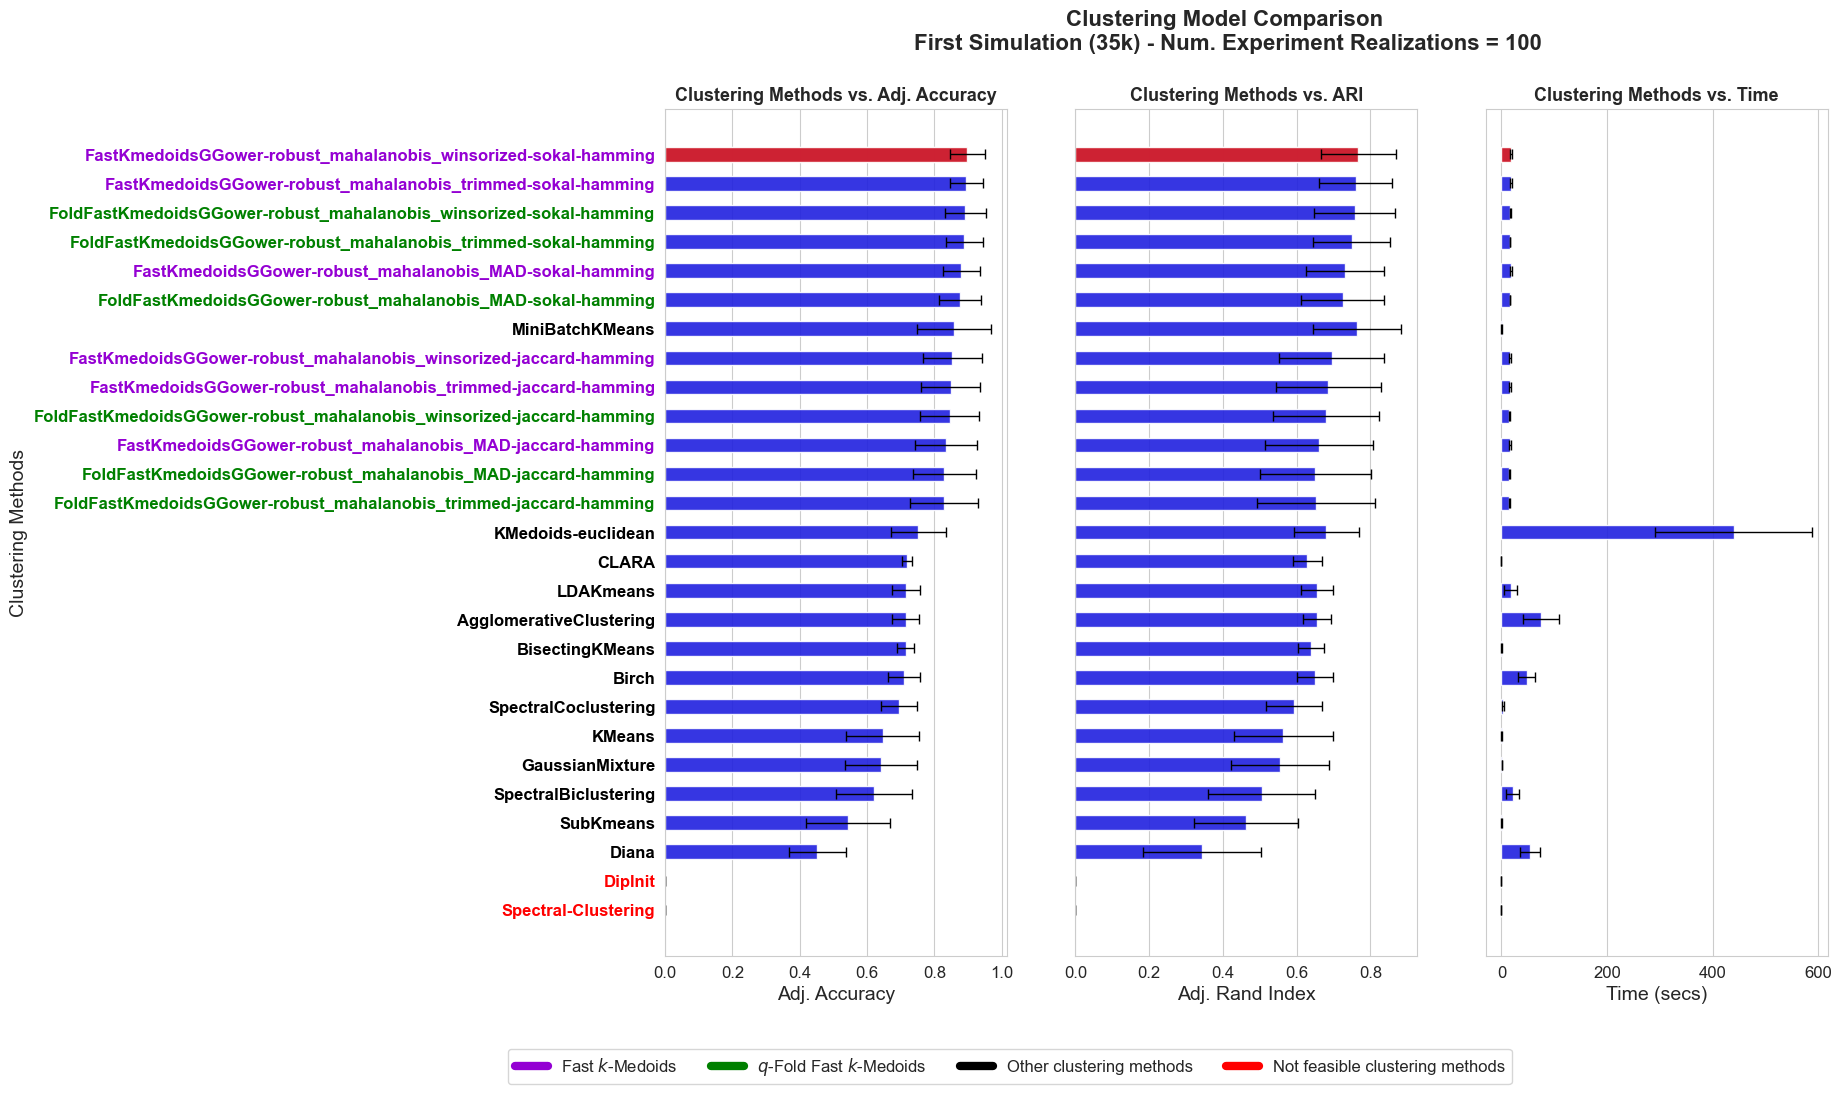

In [51]:
fig, axes = plt.subplots(1,3, figsize=(15,11))
axes = axes.flatten()

ax = sns.barplot(x=avg_adj_accuracy[idx_sorted], y=model_names[idx_sorted], color='blue', width=0.5, alpha=0.9, ax=axes[0])
ax = sns.barplot(x=[avg_adj_accuracy[idx_sorted[0]]], y=[model_names[idx_sorted[0]]], color='red', width=0.5, alpha=0.9, ax=axes[0])

ax = sns.barplot(x=avg_ari[idx_sorted], y=model_names[idx_sorted], color='blue', width=0.5, alpha=0.9, ax=axes[1])
ax = sns.barplot(x=[avg_ari[idx_sorted[0]]], y=[model_names[idx_sorted[0]]], color='red', width=0.5, alpha=0.9, ax=axes[1])

ax = sns.barplot(x=avg_time[idx_sorted], y=model_names[idx_sorted], color='blue', width=0.5, alpha=0.9, ax=axes[2])
ax = sns.barplot(x=[avg_time[idx_sorted[0]]], y=[model_names[idx_sorted[0]]], color='red', width=0.5, alpha=0.9, ax=axes[2])

# Añadir barras de error manualmente
axes[0].errorbar(
    x=avg_adj_accuracy[idx_sorted],
    y=np.arange(len(model_names[idx_sorted])),
    xerr=std_adj_acc[idx_sorted],
    fmt='none',                # no dibuja puntos extra
    ecolor='black',            # color de las líneas de error
    elinewidth=1,            # grosor de las líneas
    capsize=3.5,                 # tamaño de los topes
    alpha=1
)

axes[1].errorbar(
    x=avg_ari[idx_sorted],
    y=np.arange(len(model_names[idx_sorted])),
    xerr=std_ari[idx_sorted],
    fmt='none',                # no dibuja puntos extra
    ecolor='black',            # color de las líneas de error
    elinewidth=1,            # grosor de las líneas
    capsize=3.5,                 # tamaño de los topes
    alpha=1
)

axes[2].errorbar(
    x=avg_time[idx_sorted],
    y=np.arange(len(model_names[idx_sorted])),
    xerr=std_time[idx_sorted],
    fmt='none',                # no dibuja puntos extra
    ecolor='black',            # color de las líneas de error
    elinewidth=1,            # grosor de las líneas
    capsize=3.5,                 # tamaño de los topes
    alpha=1
)

axes[0].set_ylabel('Clustering Methods', size=14)
axes[0].set_xlabel('Adj. Accuracy', size=14)
#axes[0].set_xticks(np.round(np.linspace(0, np.max(accuracy_list), 7),2)) 
axes[0].tick_params(axis='y', labelsize=12)    
axes[0].tick_params(axis='x', labelsize=12)  
axes[0].set_title('Clustering Methods vs. Adj. Accuracy', size=13, weight='bold')

axes[1].set_xlabel('Adj. Rand Index', size=14)
#axes[1].set_xticks(np.round(np.linspace(0, np.max(adj_rand_index_list), 7),2)) 
axes[1].tick_params(axis='x', labelsize=12)  
axes[1].set_title('Clustering Methods vs. ARI', size=13, weight='bold')
axes[1].set_yticklabels([])

axes[2].set_xlabel('Time (secs)', size=14)
#axes[2].set_xticks(np.round(np.linspace(0, np.max(time_list), 7),2)) 
axes[2].tick_params(axis='x', labelsize=12)  
axes[2].set_title('Clustering Methods vs. Time', size=13, weight='bold')
axes[2].set_yticklabels([])

for label in axes[0].get_yticklabels():
    if label.get_text() in our_methods_1:
        label.set_weight('bold')
        label.set_color('darkviolet') 
    elif label.get_text() in our_methods_2:
        label.set_weight('bold')
        label.set_color('green') 
    elif label.get_text() in other_methods:
        label.set_weight('bold')
        label.set_color('black') 
    elif label.get_text() in not_feasible_methods:
        label.set_weight('bold')
        label.set_color('red') 

# Create legend elements
legend_elements = [
    plt.Line2D([0], [0], color='darkviolet', lw=6, label='Fast $k$-Medoids'),
    plt.Line2D([0], [0], color='green', lw=6, label='$q$-Fold Fast $k$-Medoids'),
    plt.Line2D([0], [0], color='black', lw=6, label='Other clustering methods'),
    plt.Line2D([0], [0], color='red', lw=6, label='Not feasible clustering methods')
]

# Add legend to the figure
axes[0].legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(2.5, -0.1), ncol=len(legend_elements), fontsize=12)

fig.suptitle("Clustering Model Comparison \nFirst Simulation (35k) - Num. Experiment Realizations = 100", fontsize=16, fontweight='bold', y=0.97)

file_id = '20250712_163620'
plot_filename = f'plot_results_exp_4_simu_1_{file_id}_acc.png'
plot_save_path = os.path.join(results_folder_path, plot_filename)
fig.savefig(plot_save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)

plt.show()

In [52]:
df_long_acc = pl.DataFrame(pivoted_results['adj_accuracy']).unpivot(
    variable_name="model",
    value_name="adj_accuracy"
)

df_long_ari = pl.DataFrame(pivoted_results['ARI']).unpivot(
    variable_name="model",
    value_name="ari"
)

df_long_time = pl.DataFrame(pivoted_results['time']).unpivot(
    variable_name="model",
    value_name="time"
)

c:\Users\fscielzo\Documents\PhD\paper-2\paper-code\.venv\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\fscielzo\Documents\PhD\paper-2\paper-code\.venv\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
c:\Users\fscielzo\Documents\PhD\paper-2\paper-code\.venv\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


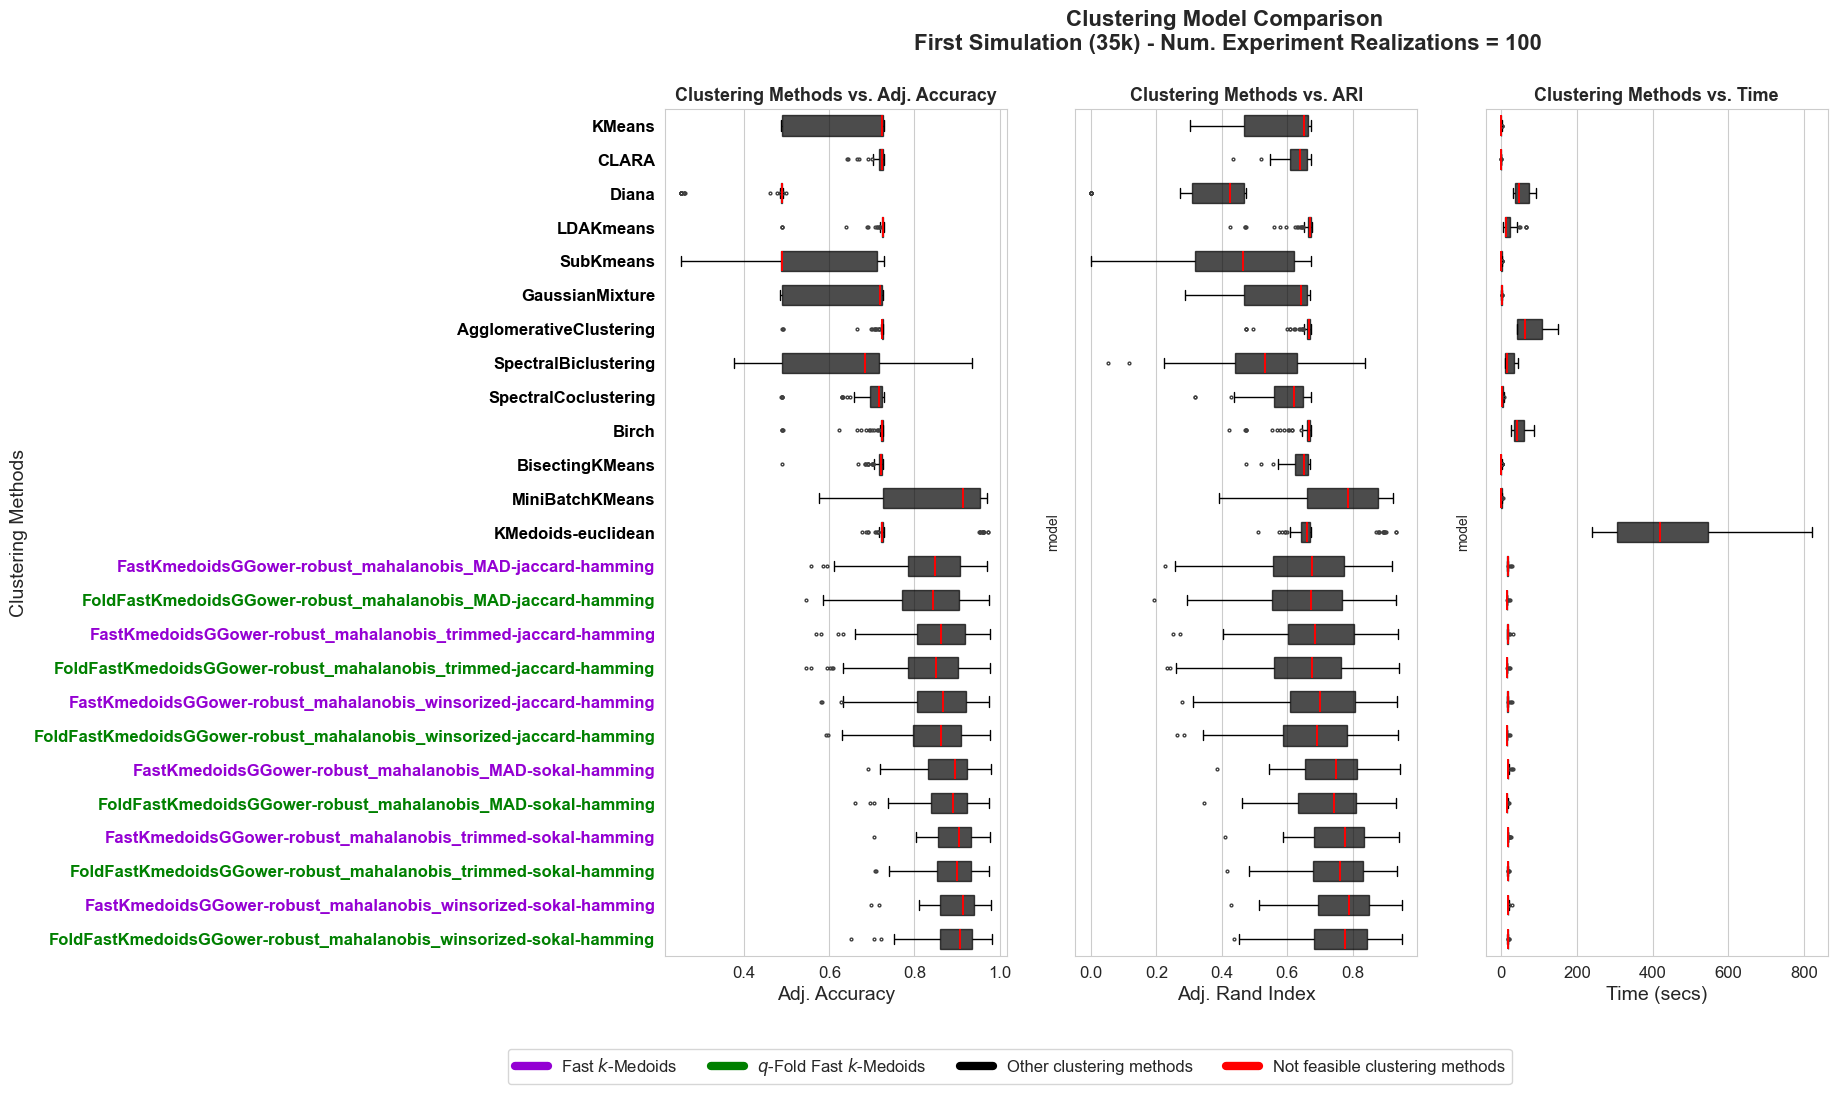

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 11))
axes = axes.flatten()

# === 1️⃣ Boxplot Adj. Accuracy ===
sns.boxplot(
    data=df_long_acc,
    y='model', x='adj_accuracy',
    ax=axes[0],
    orient='h',
    width=0.6,
    fliersize=2,
    boxprops=dict(alpha=0.7, color='black'),
    medianprops=dict(color='red', linewidth=1.4),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# === 2️⃣ Boxplot ARI ===
sns.boxplot(
    data=df_long_ari,
    y='model', x='ari',
    ax=axes[1],
    orient='h',
    width=0.6,
    fliersize=2,
    boxprops=dict(alpha=0.7, color='black'),
    medianprops=dict(color='red', linewidth=1.4),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# === 3️⃣ Boxplot Time ===
sns.boxplot(
    data=df_long_time,
    y='model', x='time',
    ax=axes[2],
    orient='h',
    width=0.6,
    fliersize=2,
    boxprops=dict(alpha=0.7, color='black'),
    medianprops=dict(color='red', linewidth=1.4),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# === Etiquetas y títulos ===
axes[0].set_ylabel('Clustering Methods', size=14)
axes[0].set_xlabel('Adj. Accuracy', size=14)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].set_title('Clustering Methods vs. Adj. Accuracy', size=13, weight='bold')

axes[1].set_xlabel('Adj. Rand Index', size=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].set_title('Clustering Methods vs. ARI', size=13, weight='bold')
axes[1].set_yticklabels([])

axes[2].set_xlabel('Time (secs)', size=14)
axes[2].tick_params(axis='x', labelsize=12)
axes[2].set_title('Clustering Methods vs. Time', size=13, weight='bold')
axes[2].set_yticklabels([])

# === Colorear etiquetas por grupo ===
for ax in axes:
    for label in ax.get_yticklabels():
        text = label.get_text()
        if text in our_methods_1:
            label.set_color('darkviolet')
            label.set_weight('bold')
        elif text in our_methods_2:
            label.set_color('green')
            label.set_weight('bold')
        elif text in other_methods:
            label.set_color('black')
            label.set_weight('bold')
        elif text in not_feasible_methods:
            label.set_color('red')
            label.set_weight('bold')

# === Leyenda ===
legend_elements = [
    plt.Line2D([0], [0], color='darkviolet', lw=6, label='Fast $k$-Medoids'),
    plt.Line2D([0], [0], color='green', lw=6, label='$q$-Fold Fast $k$-Medoids'),
    plt.Line2D([0], [0], color='black', lw=6, label='Other clustering methods'),
    plt.Line2D([0], [0], color='red', lw=6, label='Not feasible clustering methods')
]
axes[0].legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(2.5, -0.1),
               ncol=len(legend_elements), fontsize=12)

# === Título general ===
fig.suptitle(
    "Clustering Model Comparison \nFirst Simulation (35k) - Num. Experiment Realizations = 100",
    fontsize=16, fontweight='bold', y=0.97
)

plt.show()

In [54]:
# Results as table 
avg_results_df = pd.DataFrame(avg_results)
avg_results_df.index.name = 'models'
avg_results_df = avg_results_df.drop(['labels', 'adj_labels'], axis=1)
avg_results_df_sorted_acc = avg_results_df.sort_values(by='adj_accuracy', ascending=False)
avg_results_df_sorted_ari = avg_results_df.sort_values(by='ARI', ascending=False)

In [55]:
avg_results_df_sorted_acc

,time,adj_accuracy,ARI,std_adj_acc,std_ARI,std_time
models,,,,,,
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming,18.314043,0.898372,0.767493,0.052319,0.101478,1.050667
FastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming,18.426460,0.895430,0.759797,0.049605,0.099790,1.175489
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming,16.750068,0.891847,0.757069,0.060551,0.110672,0.584856
FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming,16.718407,0.888761,0.749275,0.055582,0.105061,0.456705
FastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming,18.445302,0.880637,0.731764,0.055864,0.105521,1.895878
FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming,16.240174,0.876285,0.724363,0.061784,0.112221,0.555799
MiniBatchKMeans,0.516530,0.857945,0.764349,0.109722,0.118870,0.592544
FastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming,16.814054,0.853621,0.695368,0.088332,0.142698,1.700578
FastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming,16.850161,0.848716,0.685425,0.088340,0.142175,1.612075


In [56]:
avg_results_df_sorted_ari

,time,adj_accuracy,ARI,std_adj_acc,std_ARI,std_time
models,,,,,,
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming,18.314043,0.898372,0.767493,0.052319,0.101478,1.050667
MiniBatchKMeans,0.516530,0.857945,0.764349,0.109722,0.118870,0.592544
FastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming,18.426460,0.895430,0.759797,0.049605,0.099790,1.175489
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming,16.750068,0.891847,0.757069,0.060551,0.110672,0.584856
FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming,16.718407,0.888761,0.749275,0.055582,0.105061,0.456705
FastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming,18.445302,0.880637,0.731764,0.055864,0.105521,1.895878
FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming,16.240174,0.876285,0.724363,0.061784,0.112221,0.555799
FastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming,16.814054,0.853621,0.695368,0.088332,0.142698,1.700578
FastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming,16.850161,0.848716,0.685425,0.088340,0.142175,1.612075


### MDS vidualization

In [81]:
experiment_4_config['random_state']

123

In [103]:
for random_state_mds in results.keys():
    print(random_state_mds, results[random_state_mds]['adj_accuracy']['MiniBatchKMeans'])

6863 0.9536857142857142
35084 0.7250571428571428
11427 0.9635428571428571
53377 0.9554857142857143
34937 0.9476571428571429
14116 0.7247428571428571
5000 0.9036285714285714
49692 0.9700571428571428
70281 0.9036571428571428
73704 0.7231142857142857
43541 0.9703142857142857
44669 0.9436
6802 0.7242285714285714
20927 0.9557428571428571
17702 0.9519428571428571
44199 0.7251714285714286
73526 0.8843714285714286
43751 0.7272857142857143
91971 0.8993428571428571
32134 0.7095714285714285
21466 0.9132
218 0.9162
57183 0.9617428571428571
11483 0.8661714285714286
78328 0.9223428571428571
49492 0.9600857142857143
9158 0.7206571428571429
864 0.5761714285714286
41347 0.8840285714285714
95949 0.9502285714285714
58762 0.8710571428571429
13374 0.9519714285714286
5752 0.9528571428571428
12158 0.7258
87443 0.9486285714285714
18635 0.7250857142857143
16547 0.7238571428571429
2783 0.9532571428571428
38247 0.8359428571428571
56444 0.9560857142857143
75157 0.7153714285714285
62511 0.7158571428571429
34776 0.

In [128]:
random_state_mds = 75126  

X, y, outliers_idx = get_simulation_1(random_state=random_state_mds, return_outlier_idx=True)

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state_mds) 


fastGG = FastGGowerDistMatrix(frac_sample_size=0.03, 
                              random_state=100,
                              p1=experiment_4_config['p1'], 
                              p2=experiment_4_config['p2'], 
                              p3=experiment_4_config['p3'], 
                              d1='robust_mahalanobis', 
                              d2='sokal', 
                              d3='hamming', 
                              robust_method='winsorized', 
                              alpha=experiment_4_config['alpha'])

fastGG.compute(X)

X_mds = mds.fit_transform(fastGG.D_GGower)

# Time: 1.15 mins

c:\Users\fscielzo\Documents\PhD\paper-2\paper-code\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


In [129]:
outliers_bool = np.array([0 if x not in outliers_idx else 1 for x in range(0, len(X))])

sorted_methods_accuracy = list(avg_results_df_sorted_acc.index)

our_methods_1_sorted_acc = [x for x in list(sorted_methods_accuracy) if x in our_methods_1]
our_methods_2_sorted_acc = [x for x in list(sorted_methods_accuracy) if x in our_methods_2]
other_methods_sorted_acc = [x for x in list(sorted_methods_accuracy) if x in other_methods]
best_our_methods_1 = our_methods_1_sorted_acc[0]
best_our_methods_2 = our_methods_2_sorted_acc[0]
best_other_methods = other_methods_sorted_acc[0]
additional_methods = ['KMeans', 'KMedoids-euclidean']

methods_to_plot = [best_our_methods_1, best_our_methods_2, best_other_methods] + additional_methods
names_to_plot = [('Best Fast k-medoids' if x in our_methods_1 else 'Best q-Fold Fast k-medoids' if x in our_methods_2 else x) for x in methods_to_plot]
names_to_plot = dict(zip(methods_to_plot, names_to_plot))
y_pred_dict = {names_to_plot[method]: results[random_state_mds]['adj_labels'][method][fastGG.sample_index] for method in methods_to_plot}
accuracy_dict = {names_to_plot[method]: results[random_state_mds]['adj_accuracy'][method] for method in methods_to_plot}
time_dict = {names_to_plot[method]: results[random_state_mds]['time'][method] for method in methods_to_plot}


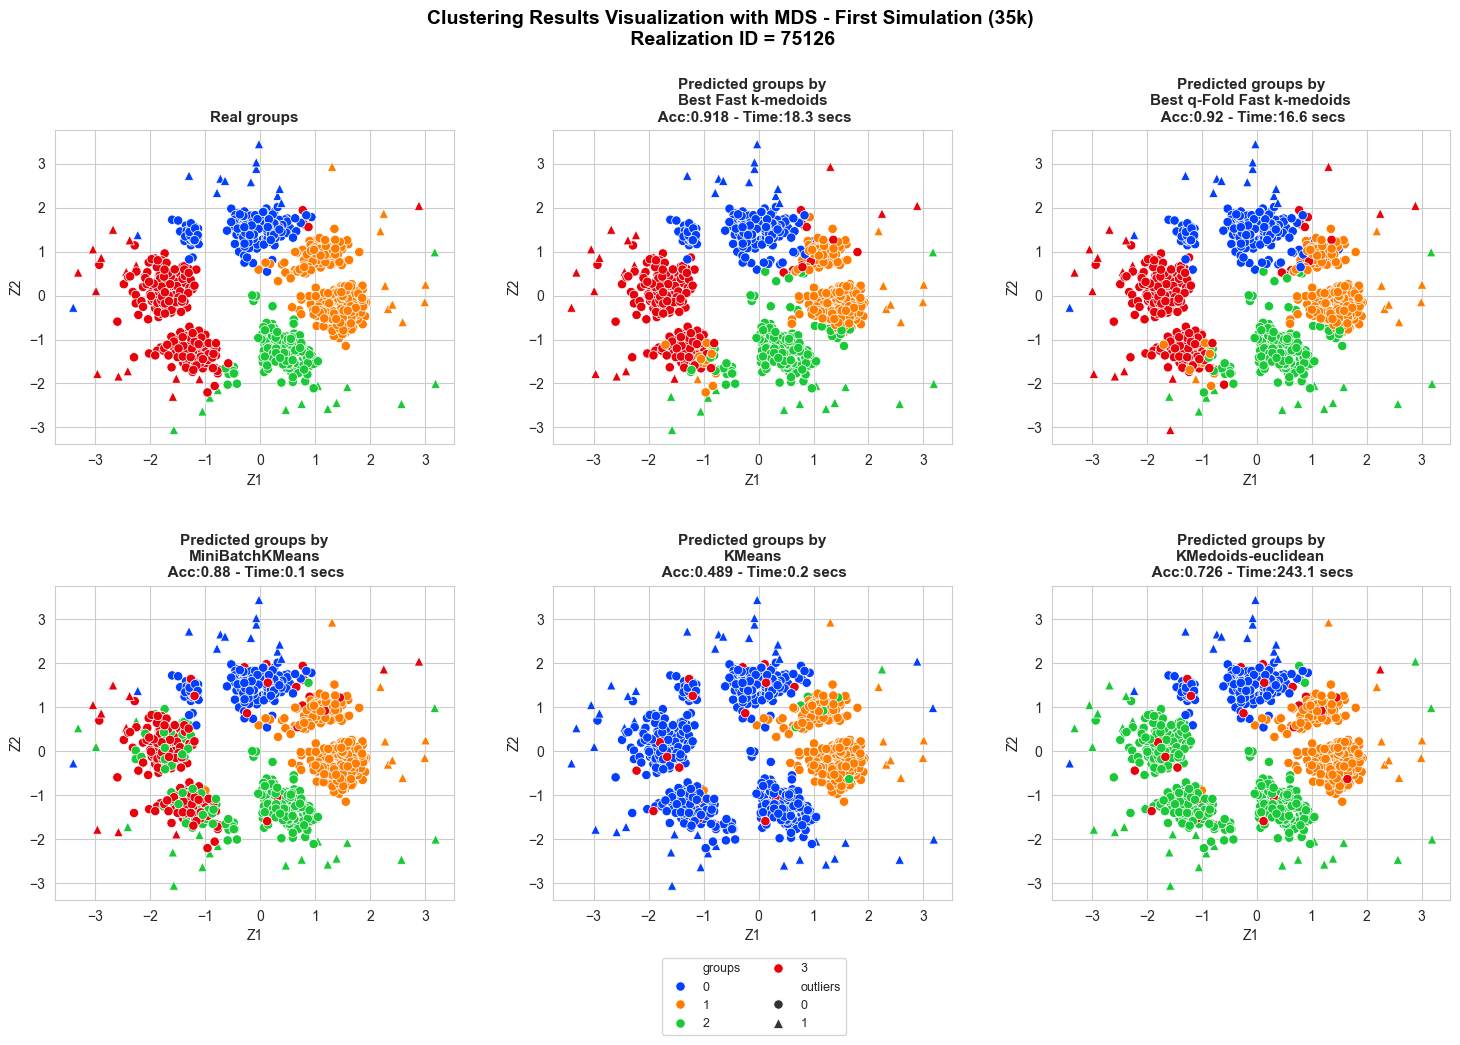

In [130]:
plot_filename = f'mds_plot_exp_4_simu_1_{file_id}.png'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_4', 'simulation_1')
plot_save_path = os.path.join(results_folder_path, plot_filename)

clustering_MDS_plot_multiple_methods(X_mds=X_mds, y_pred=y_pred_dict, 
                                     y_true=y[fastGG.sample_index],
                                     title=f"Clustering Results Visualization with MDS - First Simulation (35k)\n Realization ID = {random_state_mds}", 
                                     accuracy=accuracy_dict, time=time_dict, n_rows=2,
                                     figsize=(18,10), bbox_to_anchor=(0.75,-1.9), 
                                     title_size=14, title_weight='bold', 
                                     subtitles_size=11,
                                     points_size=45, title_height=1, 
                                     wspace=0.25, hspace=0.45, 
                                     outliers_boolean=outliers_bool[fastGG.sample_index],
                                     n_cols_legend=2, legend_title='', legend_size=9, 
                                     save = True, file_name = plot_save_path
)